In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv("Heapsort-k64-n4096-low1800-high360-frekv125.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])
name_ = []
loopTime_ = []
iterTime_ = []
avgCurrent_ = []
avgWatt_ = []
avgJoule_ = []

df4k = pd.read_csv("heapsort-k16-n4096.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df6k = pd.read_csv("heapsort-k16-n6144.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df8k = pd.read_csv("heapsort-k16-n8192.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df10k = pd.read_csv("heapsort-k16-n10240.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df12k = pd.read_csv("heapsort-k16-n12288.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df14k = pd.read_csv("heapsort-k16-n14336.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df16k = pd.read_csv("heapsort-k16-n16384.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])


In [3]:
# Gets the index of all measurements considered a spike
def getSpikeList(df, limit):
    spikeindexlist = []
    for i in range(0, df['nb'].max()+1):
        if df['Current'][i] > limit:
            spikeindexlist.append(i)
    return spikeindexlist

In [4]:
# Gets the times of each loop and how many loops there are
def findTimes(spikes, df, dataRange):
    loopTimeList = []
    i = 0
    while i <= dataRange: 
        if i not in spikes:
            loopStart = df['time'][i]
            while i not in spikes and i <= dataRange:
                loopStop = df['time'][i]
                i +=1
            loopTimeList.append(loopStop - loopStart)
        i +=1
    print("Number of loops: ")
    print(len(loopTimeList))
    return loopTimeList

In [5]:
# Calculates the avarage time of the loops
def avgTimeLoop(loopTimeList):
    time = sum(loopTimeList)/len(loopTimeList)
    print("Avarage time of loop: ")
    print(time)
    print("[s]")
    return time

In [6]:
# Calculates the avarage time of one iteration 
def avgTimeIteration(looptime, repetitions):
    time = looptime / repetitions
    print("\nAvarage time of one Iteration: ")
    print(time)
    print("[s]")
    return time

In [7]:
# Calculates the avarage current during one iteration
def avgCurrent(df, spikeList):
    sumCurrent = 0;
    dataPoints = 0;
    for i in range(df['nb'].iloc[-1]):
        if i not in spikeList:
            sumCurrent += df['Current'][i]
            dataPoints += 1
    current = sumCurrent / dataPoints
    print("\nAvarage Current in one iteration: ")
    print(current)
    print("[mA]")
    return current

In [8]:
def avgWatt(current):
    watt = current * 5
    print("\nAvarage Watt for one iteration: ")
    print(watt)
    print("[W]")
    return watt

In [9]:
def avgJoule(watt, time):
    joule = watt * time
    print("\nAvarage Joule in one iteration: ")
    print(joule)
    print("[J]")
    return joule

In [10]:
# Full data processing
def runData(df, energyLimit, timeRepetion, loopRepititions, name):
    print(name)
    
    # Read for energyLimit
    plot = sns.scatterplot(data=df, x = 'time', y = 'Current')
    plot.set(xlim =(0, df['time'].iloc[-1]), ylim = (0, 0.2), title="Energy")
    plt.show()
    
    # Get a sense of runtime distribution
    spikes = getSpikeList(df, energyLimit)
    timelist = findTimes(spikes,df, df['nb'].iloc[-1]-1)
    hist = sns.histplot(data=timelist, kde=True)
    hist.set(ylim = (0,timeRepetion), title="Times")
    plt.show()
    
    # Calculate
    looptime = avgTimeLoop(timelist)
    time = avgTimeIteration(looptime, loopRepititions)
    current = avgCurrent(df, spikes)
    watt = avgWatt(current)
    joule = avgJoule(watt, time)
    
    # Save data
    name_.append(name)
    loopTime_.append(looptime)
    iterTime_.append(time)
    avgCurrent_.append(current)
    avgWatt_.append(watt)
    avgJoule_.append(joule)

FPGA k: 16 n: 4K


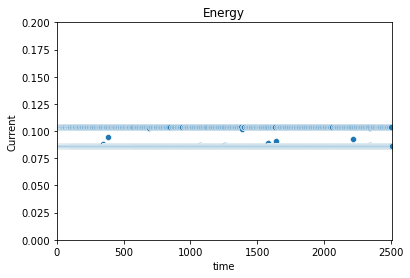

Number of loops: 
519


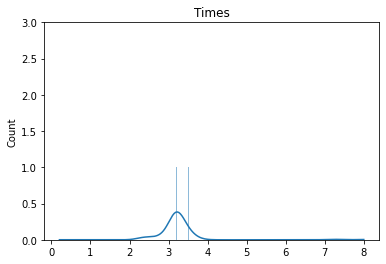

Avarage time of loop: 
3.258046242774565
[s]

Avarage time of one Iteration: 
0.0021019653179190742
[s]

Avarage Current in one iteration: 
0.08623775549862887
[mA]

Avarage Watt for one iteration: 
0.4311887774931444
[W]

Avarage Joule in one iteration: 
0.0009063438557665142
[J]


In [11]:
#      (Data, Greater than means spike, hist ylim, Repetions in loop, Name)
runData(df4k, 0.09,                     3,         1550,              "FPGA k: 16 n: 4K")

FPGA k: 16 n: 6K


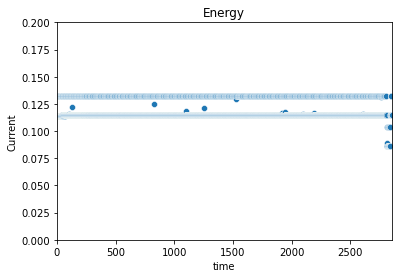

Number of loops: 
541


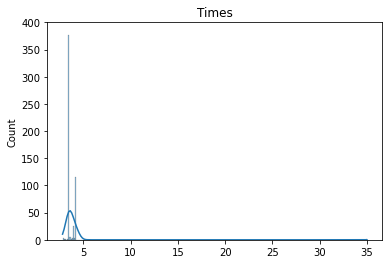

Avarage time of loop: 
3.7331109057301277
[s]

Avarage time of one Iteration: 
0.0036138537325557866
[s]

Avarage Current in one iteration: 
0.11414196784397343
[mA]

Avarage Watt for one iteration: 
0.5707098392198672
[W]

Avarage Joule in one iteration: 
0.00206246188267103
[J]


In [12]:
#      (Data, Greater than means spike, hist ylim, Repetions in loop, Name)
runData(df6k, 0.125,                    400,       1033,              "FPGA k: 16 n: 6K")

FPGA k: 16 n: 8K


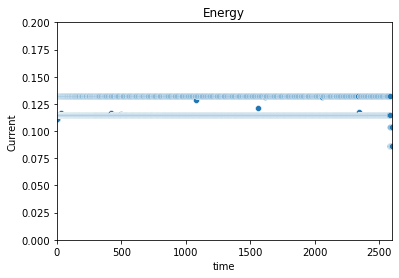

Number of loops: 
468


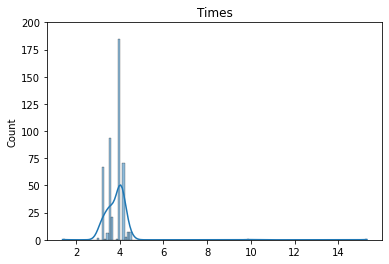

Avarage time of loop: 
3.843196581196583
[s]

Avarage time of one Iteration: 
0.004958963330576236
[s]

Avarage Current in one iteration: 
0.1144229660504848
[mA]

Avarage Watt for one iteration: 
0.5721148302524239
[W]

Avarage Joule in one iteration: 
0.002837096464100618
[J]


In [13]:
#      (Data, Greater than means spike, hist ylim, Repetions in loop, Name)
runData(df8k, 0.125,                    200,       775,               "FPGA k: 16 n: 8K")

FPGA k: 16 n: 10K


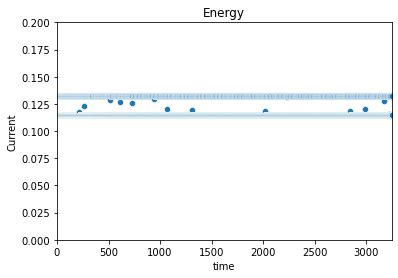

Number of loops: 
571


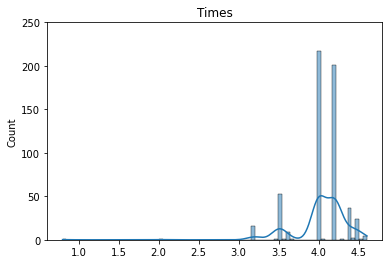

Avarage time of loop: 
4.037879159369531
[s]

Avarage time of one Iteration: 
0.00651270832156376
[s]

Avarage Current in one iteration: 
0.11458742980997376
[mA]

Avarage Watt for one iteration: 
0.5729371490498688
[W]

Avarage Joule in one iteration: 
0.003731372538350097
[J]


In [14]:
#      (Data,  Greater than means spike, ylim, Repetions in loop, Name)
runData(df10k, 0.125,                    250,       620,               "FPGA k: 16 n: 10K")

FPGA k: 16 n: 12K


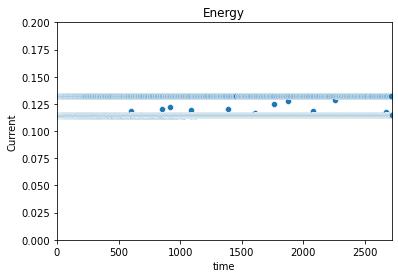

Number of loops: 
468


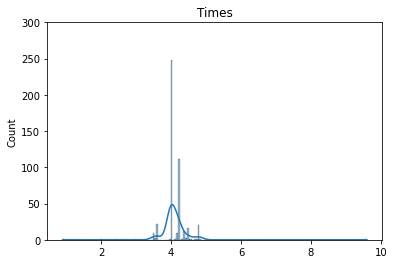

Avarage time of loop: 
4.087816239316238
[s]

Avarage time of one Iteration: 
0.007922124494798911
[s]

Avarage Current in one iteration: 
0.11444156148610671
[mA]

Avarage Watt for one iteration: 
0.5722078074305336
[W]

Avarage Joule in one iteration: 
0.004533101487360608
[J]


In [15]:
#      (Data,  Greater than means spike, ylim, Repetions in loop, Name)
runData(df12k, 0.125,                    300,       516,               "FPGA k: 16 n: 12K")

FPGA k: 16 n: 14K


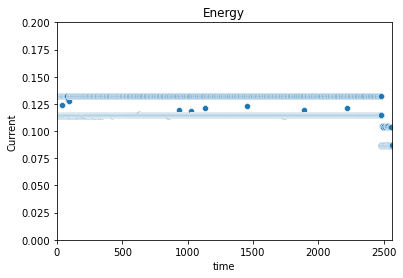

Number of loops: 
423


In [ ]:
#      (Data,  Greater than means spike, ylim, Repetions in loop, Name)
runData(df14k, 0.125,                    300,       442,               "FPGA k: 16 n: 14K")

In [ ]:
#      (Data,  Greater than means spike, ylim, Repetions in loop, Name)
runData(df16k, 0.09,                    300,       387,               "FPGA k: 16 n: 16K")

In [ ]:
result = {'name':name_, 'loopTime':loopTime_, 'iterTime':iterTime_, 'avgCurrent':avgCurrent_, 'avgWatt':avgWatt_, 'avgJoule':avgJoule_}
FPGAHeapsortResults = pd.DataFrame(data=result)
FPGAHeapsortResults.to_csv(index=False)
FPGAHeapsortResults
